In [3]:
import numpy as np
import pandas as pd

# display all columns
pd.set_option("display.max_columns", None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
thefts_joined = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bike_thefts_joined.csv',
                           dtype={'n_id': str})
neighbourhoods = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/neighbourhoods.csv',
                            dtype={'n_id': str})

In [7]:
thefts_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25569 entries, 0 to 25568
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    25569 non-null  int64  
 1   objectid               25569 non-null  int64  
 2   event_unique_id        25569 non-null  object 
 3   primary_offence        25569 non-null  object 
 4   occurrence_date        25569 non-null  object 
 5   occurrence_year        25569 non-null  int64  
 6   occurrence_month       25569 non-null  object 
 7   occurrence_dayofweek   25569 non-null  object 
 8   occurrence_dayofmonth  25569 non-null  int64  
 9   occurrence_dayofyear   25569 non-null  int64  
 10  occurrence_hour        25569 non-null  int64  
 11  report_date            25569 non-null  object 
 12  report_year            25569 non-null  int64  
 13  report_month           25569 non-null  object 
 14  report_dayofweek       25569 non-null  object 
 15  re

In [8]:
thefts_joined['occurrence_date'] = pd.to_datetime(thefts_joined['occurrence_date'])
thefts_joined['report_date'] = pd.to_datetime(thefts_joined['report_date'])

In [9]:
thefts_joined.head()

,_id,objectid,event_unique_id,primary_offence,occurrence_date,occurrence_year,occurrence_month,occurrence_dayofweek,occurrence_dayofmonth,occurrence_dayofyear,occurrence_hour,report_date,report_year,report_month,report_dayofweek,report_dayofmonth,report_dayofyear,report_hour,division,city,hood_id,neighbourhoodname,location_type,premises_type,bike_make,bike_model,bike_type,bike_speed,bike_colour,bike_cost,status,objectid2,geometry,neighbourhood,n_id,designation,pop_2016,pop_2011,pop_change,private_dwellings,occupied_dwllings,pop_dens,area,total_commuters,drive,car_passenger,transit,walk,bike,other,pct_bike
0,1,17744,GO-20179016397,THEFT UNDER,2017-10-03,2017,October,Tuesday,3,276,14,2017-10-03,2017,October,Tuesday,3,276,18,D22,Toronto,15,Kingsway South (15),"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,GI,ESCAPE 2,OT,7,BLK,700.0,STOLEN,1,"{'type': 'Point', 'coordinates': (-79.50655965...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032
1,2,17759,GO-20172033056,THEFT UNDER - BICYCLE,2017-11-08,2017,November,Wednesday,8,312,3,2017-11-08,2017,November,Wednesday,8,312,22,D22,Toronto,15,Kingsway South (15),"Single Home, House (Attach Garage, Cottage, Mo...",House,UNKNOWN MAKE,NaN,TO,1,BLK,1100.0,RECOVERED,2,"{'type': 'Point', 'coordinates': (-79.50484874...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032
2,3,17906,GO-20189030822,THEFT UNDER - BICYCLE,2018-09-14,2018,September,Friday,14,257,9,2018-09-17,2018,September,Monday,17,260,16,D22,Toronto,15,Kingsway South (15),Ttc Subway Station,Transit,OT,CROSSTRAIL,MT,24,BLK,904.0,STOLEN,3,"{'type': 'Point', 'coordinates': (-79.51170915...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032
3,4,17962,GO-2015804467,THEFT UNDER,2015-05-07,2015,May,Thursday,7,127,18,2015-05-14,2015,May,Thursday,14,134,14,D22,Toronto,15,Kingsway South (15),Ttc Subway Station,Transit,GT,NaN,TO,10,BLKDGR,400.0,STOLEN,4,"{'type': 'Point', 'coordinates': (-79.51170915...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032
4,5,17963,GO-20159002781,THEFT UNDER,2015-05-16,2015,May,Saturday,16,136,12,2015-05-16,2015,May,Saturday,16,136,15,D22,Toronto,15,Kingsway South (15),Ttc Subway Station,Transit,GI,NaN,MT,6,RED,600.0,STOLEN,5,"{'type': 'Point', 'coordinates': (-79.51132657...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032


In [10]:
thefts_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25569 entries, 0 to 25568
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   _id                    25569 non-null  int64         
 1   objectid               25569 non-null  int64         
 2   event_unique_id        25569 non-null  object        
 3   primary_offence        25569 non-null  object        
 4   occurrence_date        25569 non-null  datetime64[ns]
 5   occurrence_year        25569 non-null  int64         
 6   occurrence_month       25569 non-null  object        
 7   occurrence_dayofweek   25569 non-null  object        
 8   occurrence_dayofmonth  25569 non-null  int64         
 9   occurrence_dayofyear   25569 non-null  int64         
 10  occurrence_hour        25569 non-null  int64         
 11  report_date            25569 non-null  datetime64[ns]
 12  report_year            25569 non-null  int64         
 13  r

In [12]:
thefts_joined.head()

,_id,objectid,event_unique_id,primary_offence,occurrence_date,occurrence_year,occurrence_month,occurrence_dayofweek,occurrence_dayofmonth,occurrence_dayofyear,occurrence_hour,report_date,report_year,report_month,report_dayofweek,report_dayofmonth,report_dayofyear,report_hour,division,city,hood_id,neighbourhoodname,location_type,premises_type,bike_make,bike_model,bike_type,bike_speed,bike_colour,bike_cost,status,objectid2,geometry,neighbourhood,n_id,designation,pop_2016,pop_2011,pop_change,private_dwellings,occupied_dwllings,pop_dens,area,total_commuters,drive,car_passenger,transit,walk,bike,other,pct_bike
0,1,17744,GO-20179016397,THEFT UNDER,2017-10-03,2017,October,Tuesday,3,276,14,2017-10-03,2017,October,Tuesday,3,276,18,D22,Toronto,15,Kingsway South (15),"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,GI,ESCAPE 2,OT,7,BLK,700.0,STOLEN,1,"{'type': 'Point', 'coordinates': (-79.50655965...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032
1,2,17759,GO-20172033056,THEFT UNDER - BICYCLE,2017-11-08,2017,November,Wednesday,8,312,3,2017-11-08,2017,November,Wednesday,8,312,22,D22,Toronto,15,Kingsway South (15),"Single Home, House (Attach Garage, Cottage, Mo...",House,UNKNOWN MAKE,NaN,TO,1,BLK,1100.0,RECOVERED,2,"{'type': 'Point', 'coordinates': (-79.50484874...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032
2,3,17906,GO-20189030822,THEFT UNDER - BICYCLE,2018-09-14,2018,September,Friday,14,257,9,2018-09-17,2018,September,Monday,17,260,16,D22,Toronto,15,Kingsway South (15),Ttc Subway Station,Transit,OT,CROSSTRAIL,MT,24,BLK,904.0,STOLEN,3,"{'type': 'Point', 'coordinates': (-79.51170915...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032
3,4,17962,GO-2015804467,THEFT UNDER,2015-05-07,2015,May,Thursday,7,127,18,2015-05-14,2015,May,Thursday,14,134,14,D22,Toronto,15,Kingsway South (15),Ttc Subway Station,Transit,GT,NaN,TO,10,BLKDGR,400.0,STOLEN,4,"{'type': 'Point', 'coordinates': (-79.51170915...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032
4,5,17963,GO-20159002781,THEFT UNDER,2015-05-16,2015,May,Saturday,16,136,12,2015-05-16,2015,May,Saturday,16,136,15,D22,Toronto,15,Kingsway South (15),Ttc Subway Station,Transit,GI,NaN,MT,6,RED,600.0,STOLEN,5,"{'type': 'Point', 'coordinates': (-79.51132657...",Kingsway South,15,No Designation,9271.0,9170.0,0.011,3710.0,3584.0,3593.0,2.58,3735.0,2210.0,120.0,1185.0,115.0,30.0,50.0,0.008032


In [13]:
neighbourhoods.head()

,neighbourhood,n_id,designation,pop_2016,pop_2011,pop_change,private_dwellings,occupied_dwllings,pop_dens,area,total_commuters,drive,car_passenger,transit,walk,bike,other,pct_bike
0,Agincourt North,129,No Designation,29113,30279,-0.039,9371,9120,3929,7.41,11820,7155,930,3350,265,70,45,0.005922
1,Agincourt South-Malvern West,128,No Designation,23757,21988,0.080,8535,8136,3034,7.83,10160,6135,665,2985,280,35,65,0.003445
2,Alderwood,20,No Designation,12054,11904,0.013,4732,4616,2435,4.95,6045,4090,355,1285,195,65,65,0.010753
3,Annex,95,No Designation,30526,29177,0.046,18109,15934,10863,2.81,14910,3290,290,6200,3200,1675,225,0.112341
4,Banbury-Don Mills,42,No Designation,27695,26918,0.029,12473,12124,2775,9.98,11395,7150,500,2945,615,65,140,0.005704


In [16]:
neighbourhoods['neighbourhood'].value_counts()

Agincourt North                   1
Pelmo Park-Humberlea              1
O'Connor-Parkview                 1
Oakridge                          1
Oakwood Village                   1
                                 ..
Eringate-Centennial-West Deane    1
Englemount-Lawrence               1
Elms-Old Rexdale                  1
Eglinton East                     1
Yorkdale-Glen Park                1
Name: neighbourhood, Length: 141, dtype: int64

In [17]:
# exclude City of Toronto
neighbourhoods = neighbourhoods.loc[neighbourhoods['neighbourhood'] != 'City of Toronto']

In [18]:
neighbourhoods['neighbourhood'].unique()

array(['Agincourt North', 'Agincourt South-Malvern West', 'Alderwood',
       'Annex', 'Banbury-Don Mills', 'Bathurst Manor',
       'Bay Street Corridor', 'Bayview Village', 'Bayview Woods-Steeles',
       'Bedford Park-Nortown', 'Beechborough-Greenbrook', 'Bendale',
       'Birchcliffe-Cliffside', 'Black Creek', 'Blake-Jones',
       'Briar Hill-Belgravia', 'Bridle Path-Sunnybrook-York Mills',
       'Broadview North', 'Brookhaven-Amesbury',
       'Cabbagetown-South St. James Town', 'Caledonia-Fairbank',
       'Casa Loma', 'Centennial Scarborough', 'Church-Yonge Corridor',
       'Clairlea-Birchmount', 'Clanton Park', 'Cliffcrest',
       'Corso Italia-Davenport', 'Danforth', 'Danforth East York',
       'Don Valley Village', 'Dorset Park',
       'Dovercourt-Wallace Emerson-Junction', 'Downsview-Roding-CFB',
       'Dufferin Grove', 'East End-Danforth', 'Edenbridge-Humber Valley',
       'Eglinton East', 'Elms-Old Rexdale', 'Englemount-Lawrence',
       'Eringate-Centennial-West D

In [19]:
def calc_pct(mode):
  return round(mode/neighbourhoods['total_commuters'], 3)

pct_cols = ['pct_drive', 'pct_cp', 'pct_transit', 'pct_walk']
neighbourhoods[pct_cols] = neighbourhoods.loc[:, 'drive':'walk'].apply(calc_pct)

In [20]:
neighbourhoods.head()

,neighbourhood,n_id,designation,pop_2016,pop_2011,pop_change,private_dwellings,occupied_dwllings,pop_dens,area,total_commuters,drive,car_passenger,transit,walk,bike,other,pct_bike,pct_drive,pct_cp,pct_transit,pct_walk
0,Agincourt North,129,No Designation,29113,30279,-0.039,9371,9120,3929,7.41,11820,7155,930,3350,265,70,45,0.005922,0.605,0.079,0.283,0.022
1,Agincourt South-Malvern West,128,No Designation,23757,21988,0.080,8535,8136,3034,7.83,10160,6135,665,2985,280,35,65,0.003445,0.604,0.065,0.294,0.028
2,Alderwood,20,No Designation,12054,11904,0.013,4732,4616,2435,4.95,6045,4090,355,1285,195,65,65,0.010753,0.677,0.059,0.213,0.032
3,Annex,95,No Designation,30526,29177,0.046,18109,15934,10863,2.81,14910,3290,290,6200,3200,1675,225,0.112341,0.221,0.019,0.416,0.215
4,Banbury-Don Mills,42,No Designation,27695,26918,0.029,12473,12124,2775,9.98,11395,7150,500,2945,615,65,140,0.005704,0.627,0.044,0.258,0.054


In [21]:
import matplotlib.pyplot as plt

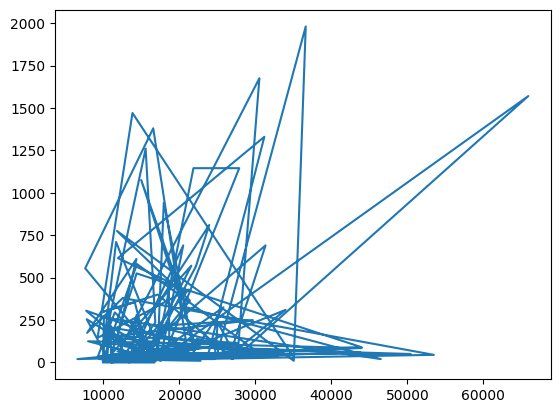

In [22]:
plt.plot(neighbourhoods['pop_2016'], neighbourhoods['bike'])

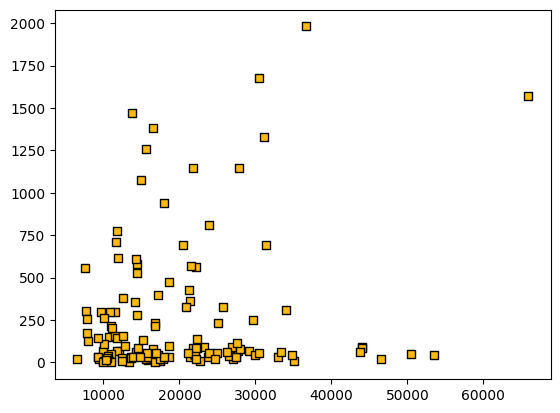

In [24]:
plt.scatter(neighbourhoods['pop_2016'], neighbourhoods['bike'],
            marker='s', facecolor='#fb1', edgecolor='k')

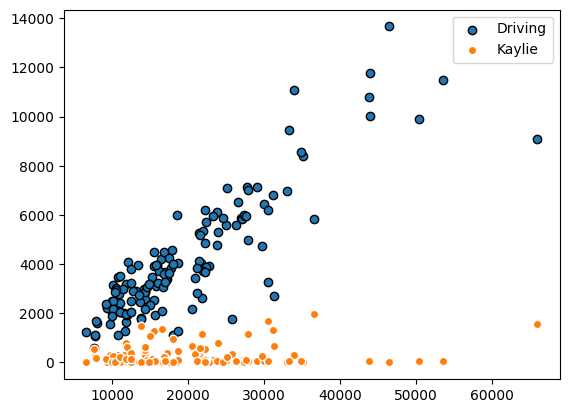

In [26]:
plt.scatter(neighbourhoods['pop_2016'],
            neighbourhoods['drive'],
            edgecolor='k',
            label='Driving')
plt.scatter(neighbourhoods['pop_2016'],
            neighbourhoods['bike'],
            edgecolor='w',
            label='Kaylie')
plt.legend()

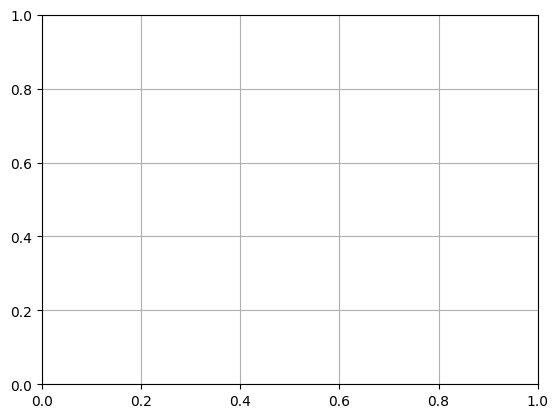

In [27]:
plt.grid()

<class 'matplotlib.figure.Figure'>, <class 'matplotlib.axes._axes.Axes'>


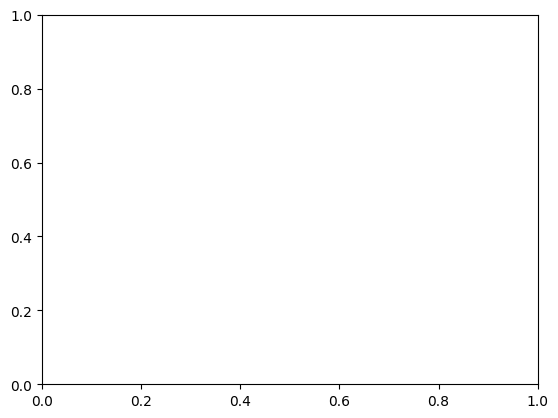

In [28]:
fig, ax = plt.subplots()
print(f'{type(fig)}, {type(ax)}')

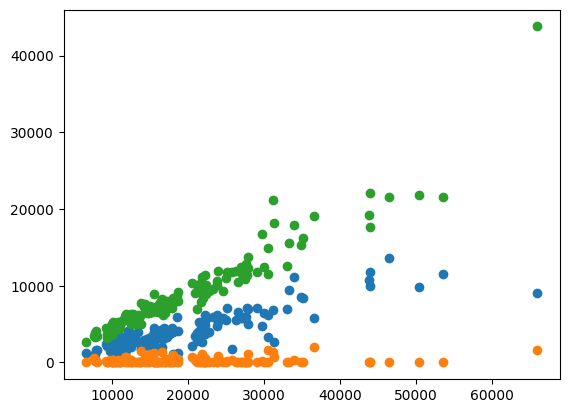

In [29]:
driver = ax.scatter(neighbourhoods['pop_2016'], neighbourhoods['drive'])
cyclist = ax.scatter(neighbourhoods['pop_2016'], neighbourhoods['bike'])
total = ax.scatter(neighbourhoods['pop_2016'], neighbourhoods['total_commuters'])
fig

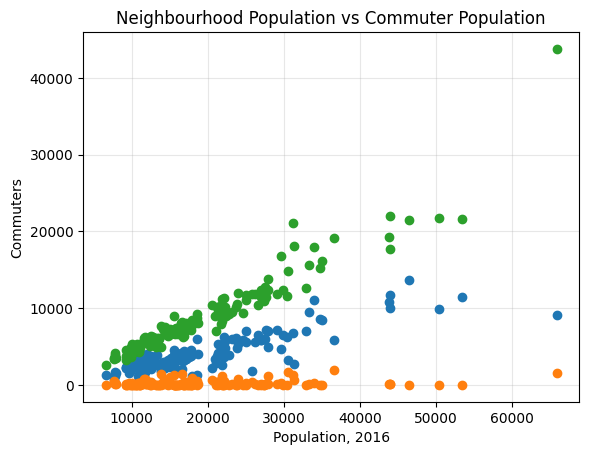

In [30]:
ax.set_title('Neighbourhood Population vs Commuter Population')
ax.set_xlabel('Population, 2016')
ax.set_ylabel('Commuters')
ax.set_axisbelow(True)
ax.grid(alpha=0.3)
fig

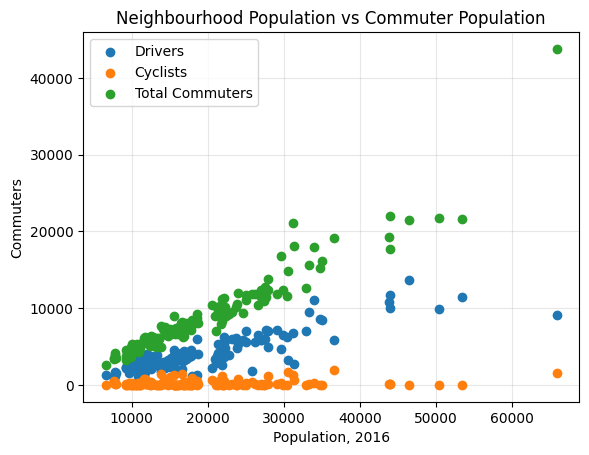

In [32]:
ax.legend([driver, cyclist, total], ['Drivers', 'Cyclists', 'Total Commuters'])
fig

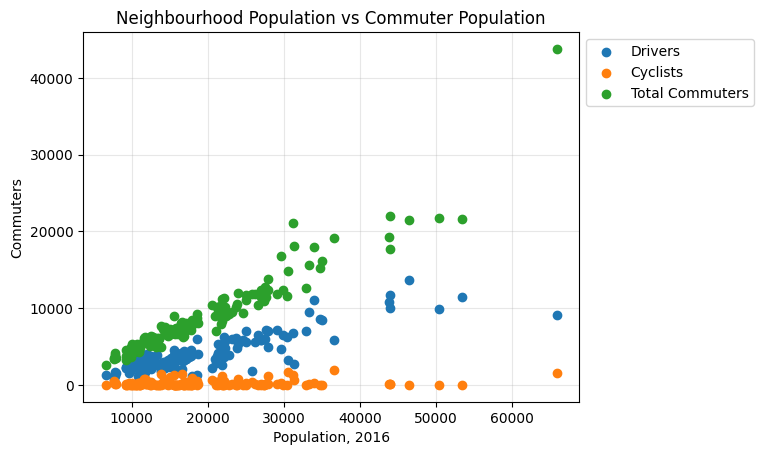

In [33]:
ax.legend([driver, cyclist, total], ['Drivers', 'Cyclists', 'Total Commuters'],
          bbox_to_anchor=(1,1),
          loc='upper left')
fig


'{x:,.0f}': This is a format string used to format the tick labels.

{x} refers to the value of the tick.

:, specifies that a comma should be used as a thousands separator.
.0f indicates that the numbers should be displayed without any decimal places (zero decimal places).


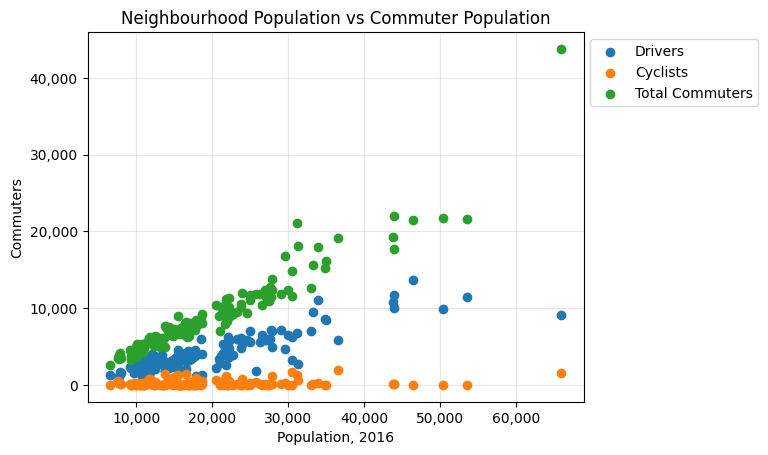

In [34]:
import matplotlib.ticker as tick

ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
fig

In [35]:
ax.axis()

(3610.2, 68879.8, -2189.25, 45974.25)

In [36]:
ax.axis()[1]

68879.8

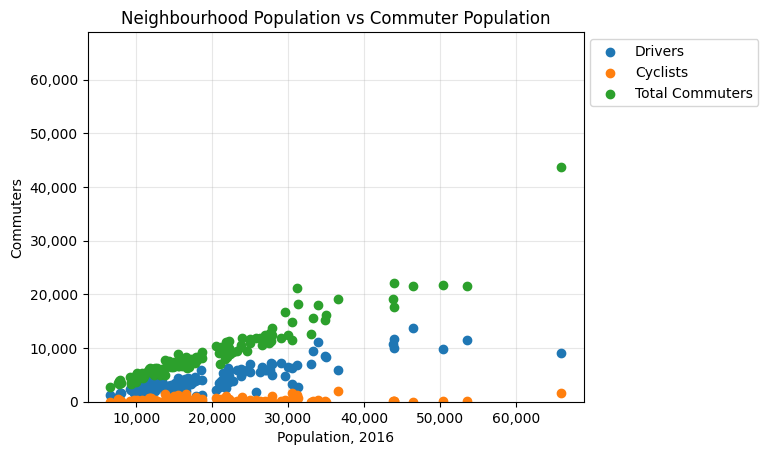

In [37]:
ax.set(ylim=(0, ax.axis()[1]))
fig

In [38]:
plt.style.available[5:10]

['classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot']

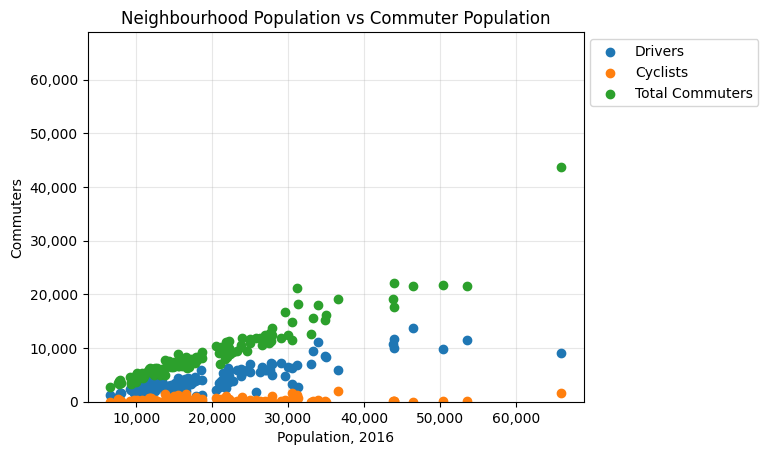

In [39]:
plt.style.use('dark_background')
fig